# Heath and Self
## Time Series Data Visualization in Python

Adapted for health and self data, specifically personal data on sleep and activity, this notebook first walks through several univariate data visualization techniques for our sleep and steps time-oriented data using Python, Pandas and Matplotlib: 

- Line Plots.
- Histograms and Density Plots.
- Box and Whisker Plots.
- Heat Maps.
- Lag Plots or Scatter Plots.
- Autocorrelation Plots.
- Z-Scores / Standardizations
- Outliers Detection with Z-Scores

After using a multivariate, moving averages and visuualziations, we examine any visual ways that show patterns. 

## Libraries and Import Data

In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas import TimeGrouper
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# let's use a better styling that default
plt.style.use('fivethirtyeight')

### Import Data

In [2]:
# which user?
data_directory = '../data/apple_watch_01/'
# data_directory = '../data/fitbit_01/'
# data_directory = '../data/fitbit_02/'

# which data point?
# datapoint = "steps"
datapoint = "sleep"
path = data_directory+"daily_"+datapoint+".csv"

# import
series = pd.Series.from_csv(path, header=0)
series = series.tail(364)

# assume zero is nan
series.replace(0, np.nan, inplace=True)

print(series.tail())

Date
2019-08-08    444
2019-08-09    448
2019-08-10    429
2019-08-11    411
2019-08-12    454
Name: Sleep, dtype: int64


### Are We Missing any Values?

In [3]:
# assume zero is nan
series.replace(0, np.nan, inplace=True)

series.isna().sum()

0

----

# Univariate Time Series Analysis

## 1. Time Series Line Plot

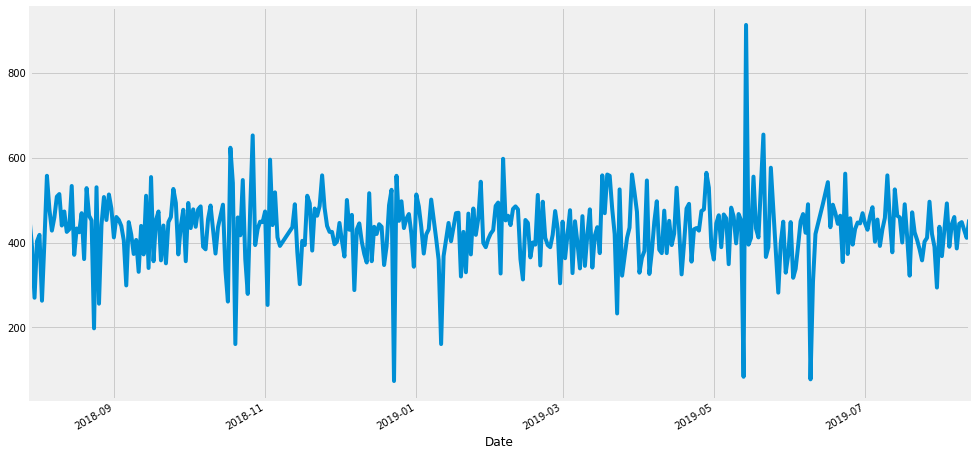

In [4]:
fig = plt.figure(figsize=(15,8))
series.plot()
plt.show()

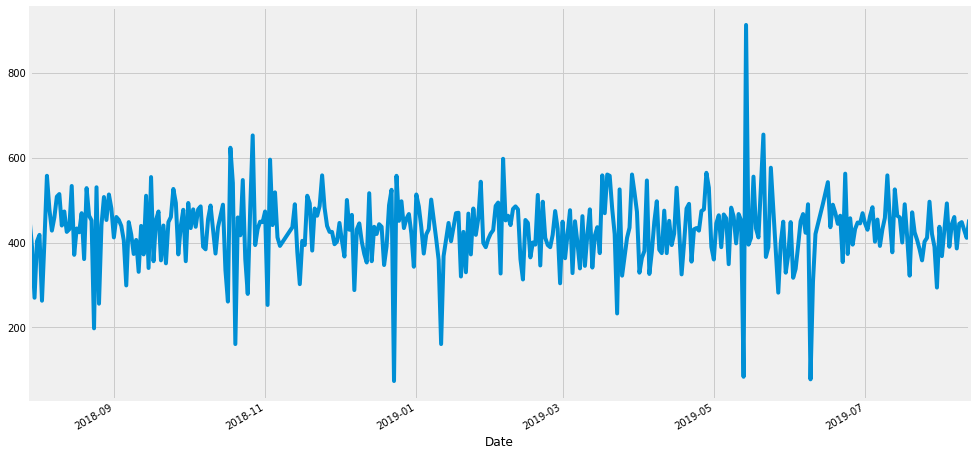

In [5]:
# fill in missing values
fig = plt.figure(figsize=(15,8))
series.interpolate(method='time').plot()
plt.show()

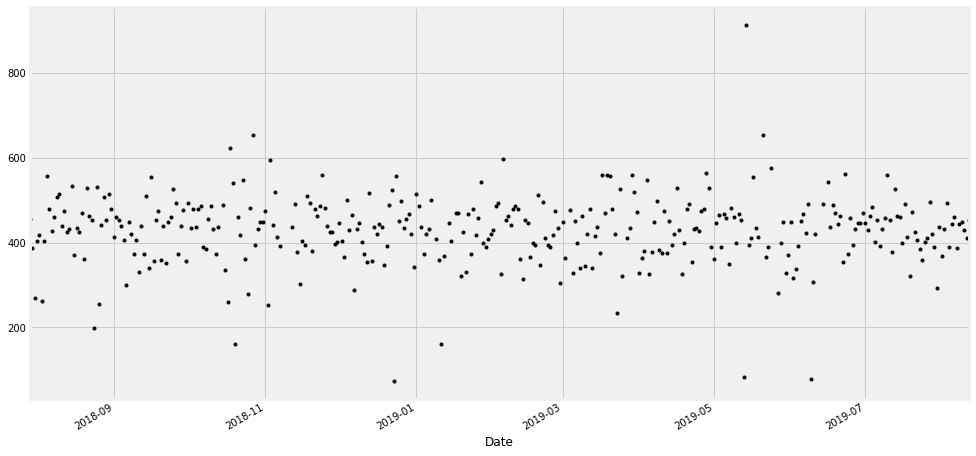

In [6]:
fig = plt.figure(figsize=(15,8))
series.plot(style='k.')
plt.show()

## 2. Time Series Histogram and Density Plots

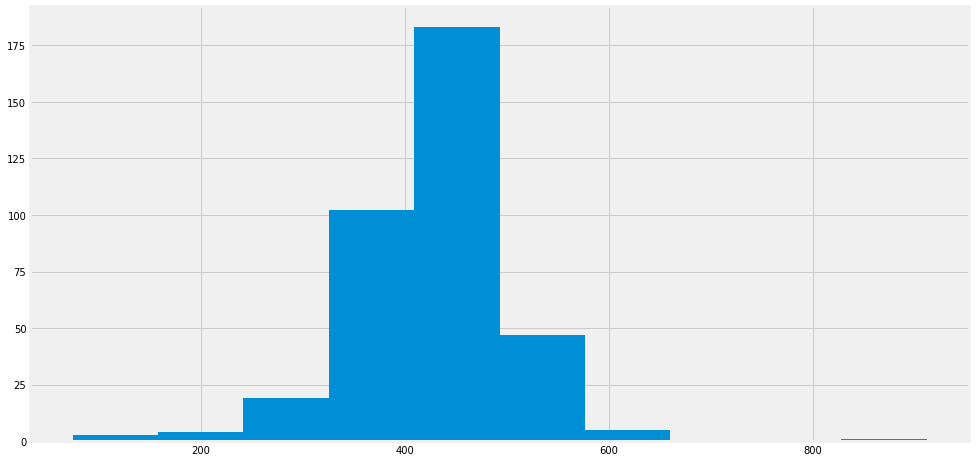

In [7]:
fig = plt.figure(figsize=(15,8))
series.hist()
plt.show()

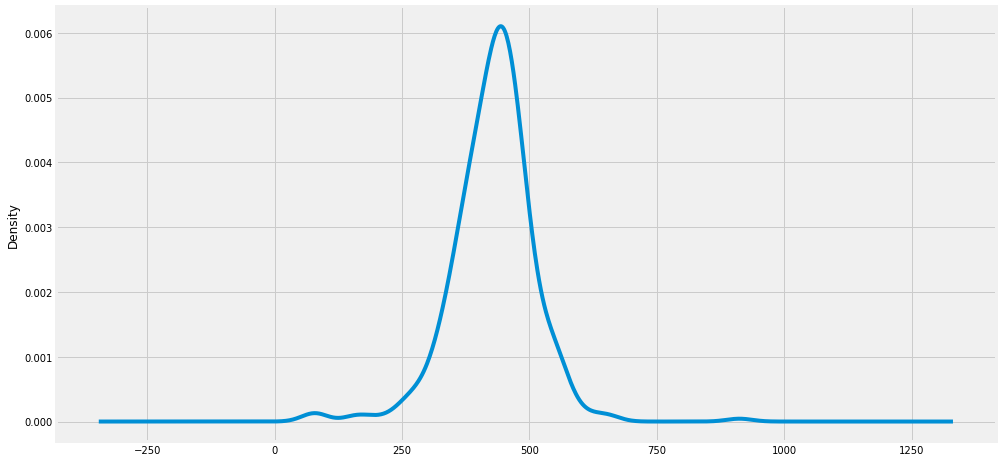

In [8]:
fig = plt.figure(figsize=(15,8))
series.plot(kind='kde')
plt.show()

## 3. Time Series Box and Whisker Plots by Interval

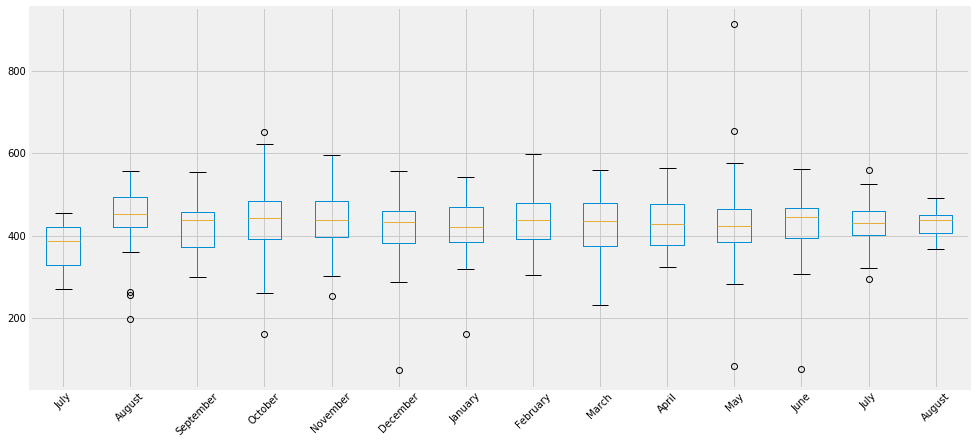

In [9]:
fig = plt.figure(figsize=(15,7))
groups = series.groupby(TimeGrouper('M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
month_names = []
for key in groups.groups.keys():
    month_names.append(key.strftime("%B")) 
months.columns = month_names
months.boxplot()
plt.xticks(rotation=45)
plt.show()

## 3b. Time Series Box and Whisker Plots by Day of Week

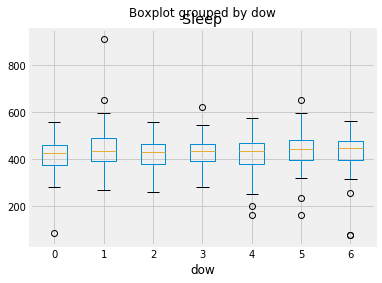

In [10]:
df = pd.DataFrame(series.transpose())
df['Date'] = pd.to_datetime(df.index)
df['dow'] = df['Date'].dt.weekday
df['day_of_week'] = df['Date'].dt.weekday_name

value_name = df.columns[0]
boxplot = df.boxplot(column=[value_name], by='dow')

## 4. Time Series Heat Maps

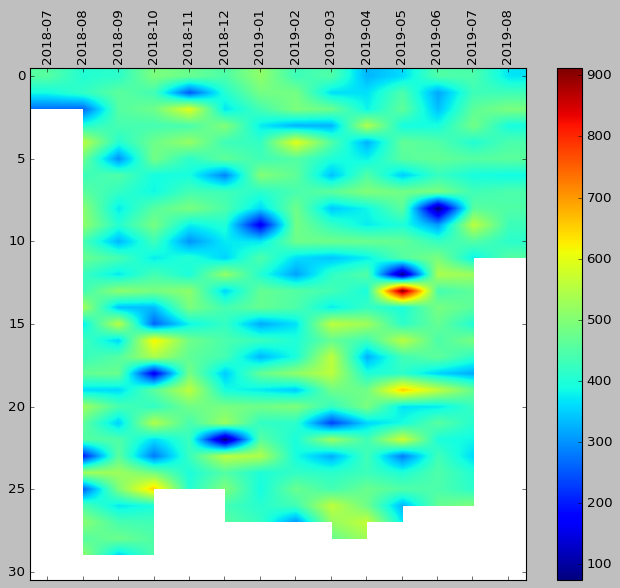

In [11]:
# better use classic to highlight this
plt.style.use('classic')

groups = series.groupby(TimeGrouper('M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
month_names = []
for key in groups.groups.keys():
    month_names.append(key.strftime("%Y-%m")) 
months.columns = month_names

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

cax = ax.matshow(months, interpolation=None, aspect='auto')
fig.colorbar(cax)

plt.xticks(np.arange(len(month_names)), month_names, rotation=90)
plt.show()

## 5. Time Series Lag Scatter Plots

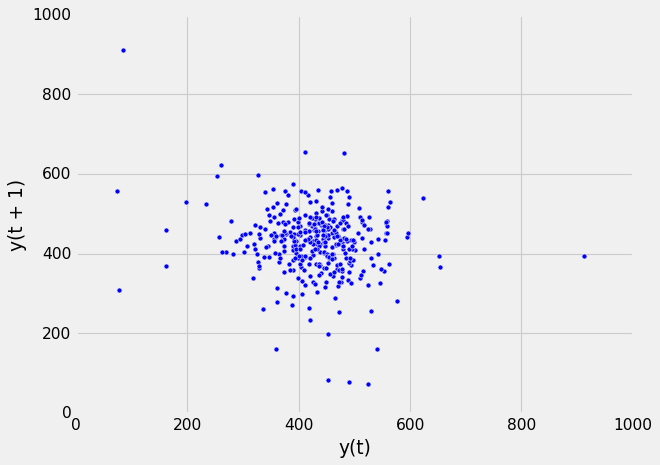

In [12]:
plt.style.use('fivethirtyeight')
# alternative from pandas.plotting import lag_plot
pd.plotting.lag_plot(series)
plt.show()

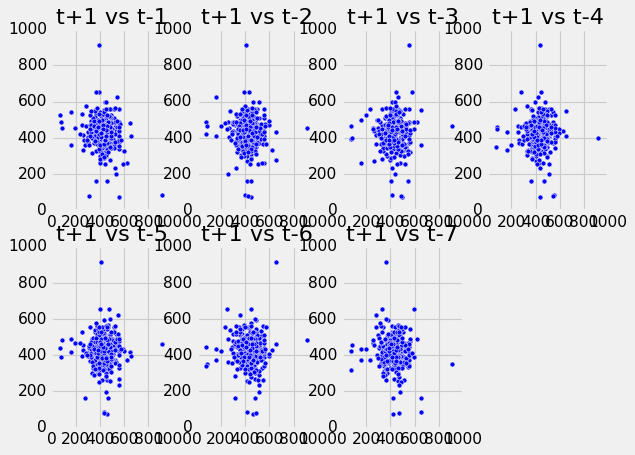

In [13]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

## 6. Time Series Autocorrelation Plots

In [14]:
# we can't check this with missing data so let's impute missing values
if series.isna().sum() > 0:
    series = series.interpolate(method='time') # time or linear

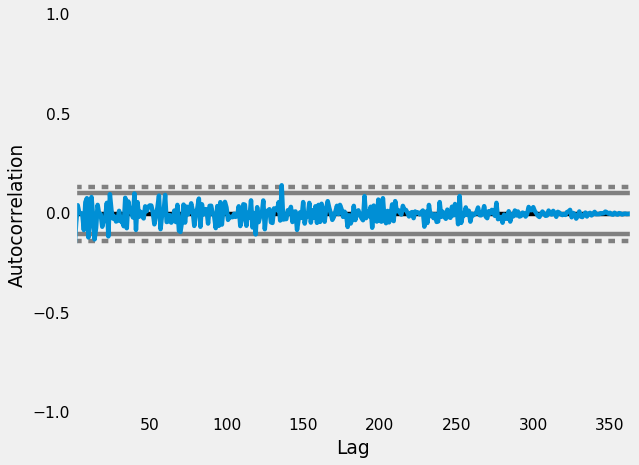

In [15]:
pd.plotting.autocorrelation_plot(series)
plt.show()

# Multivariate Analysis

### Import Data

In [16]:
s1 = pd.Series.from_csv(data_directory+"daily_sleep.csv", header=0)
s2 = pd.Series.from_csv(data_directory+"daily_steps.csv", header=0)

df = pd.concat([s1, s2], axis=1)
df = df.tail(365)

# assume zero is nan
df.replace(0, np.nan, inplace=True)

df['Sleep Hours'] = round(df['Sleep'] / 60, 2)

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Year-Month'] = df['Year'].map(str) + "-" + df['Month'].map(str)
df['Weekday Num'] = df.index.weekday
df['Weekday Name'] = df.index.weekday_name

print(df.tail())
len(df)

            Sleep  Steps  Sleep Hours  Year  Month Year-Month  Weekday Num  \
Date                                                                         
2019-08-08  444.0  10627         7.40  2019      8     2019-8            3   
2019-08-09  448.0   5342         7.47  2019      8     2019-8            4   
2019-08-10  429.0  12245         7.15  2019      8     2019-8            5   
2019-08-11  411.0  10119         6.85  2019      8     2019-8            6   
2019-08-12  454.0   9675         7.57  2019      8     2019-8            0   

           Weekday Name  
Date                     
2019-08-08     Thursday  
2019-08-09       Friday  
2019-08-10     Saturday  
2019-08-11       Sunday  
2019-08-12       Monday  


365

In [17]:
df.isna().sum()

Sleep           16
Steps            0
Sleep Hours     16
Year             0
Month            0
Year-Month       0
Weekday Num      0
Weekday Name     0
dtype: int64

## Line Plot

Text(0.5, 0.98, 'Raw: Sleep vs. Steps')

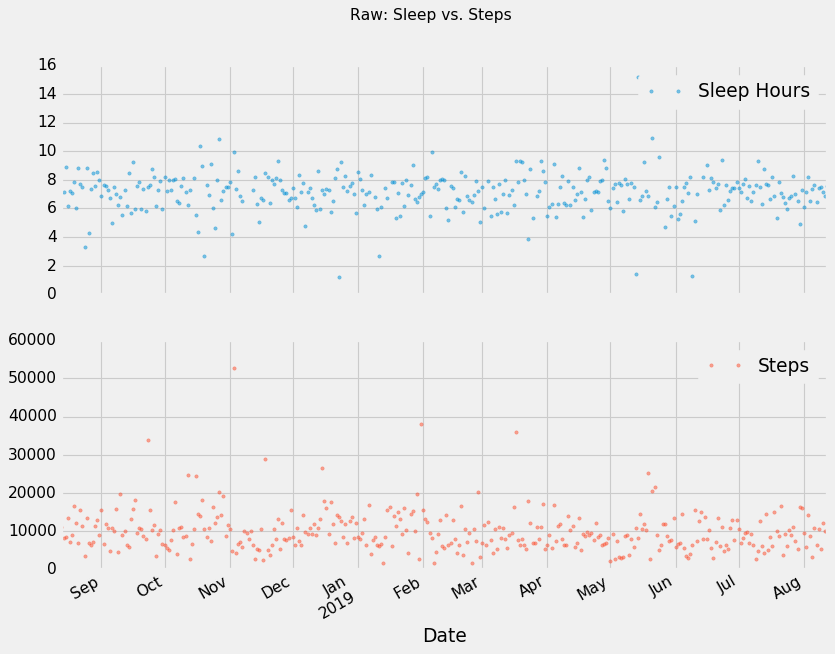

In [18]:
cols_plot = ['Sleep Hours', 'Steps']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
plt.suptitle("Raw: Sleep vs. Steps")

## Box Plot

Text(0.5, 0.98, 'Monthly: Sleep vs. Steps')

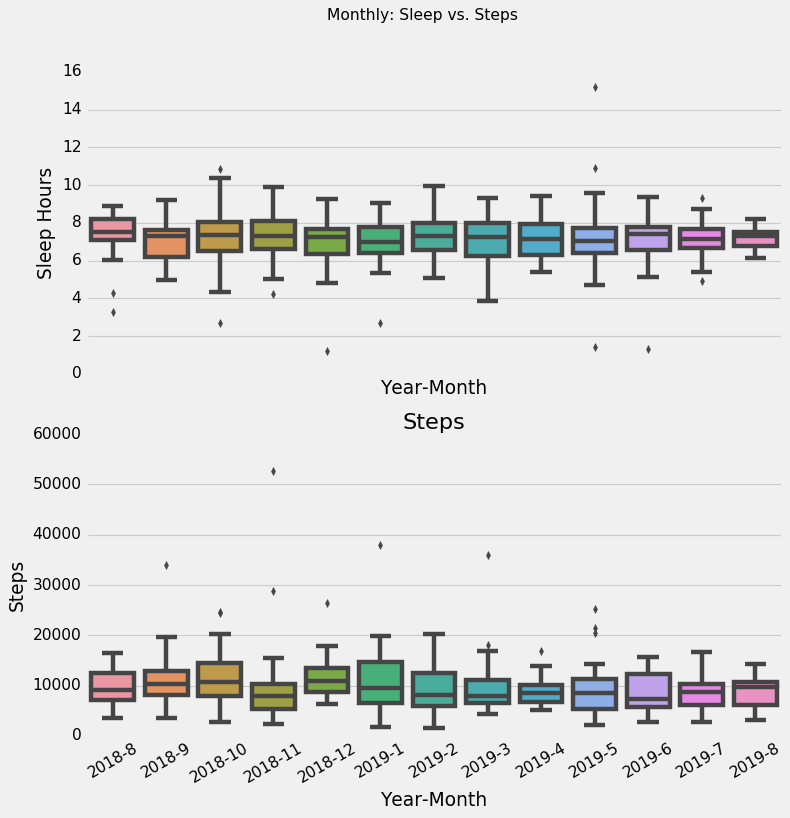

In [19]:
cols_plot = ['Sleep Hours', 'Steps']
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
for name, ax in zip(cols_plot, axes):
    # print(name)
    sns.boxplot(data=df, x='Year-Month', y=name, ax=ax)
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.suptitle("Monthly: Sleep vs. Steps")    

## Rolling Averages

In [20]:
# fill in missing values if we can
if df['Sleep'].isna().sum() > 0:
    df['Sleep'] = df['Sleep'].interpolate(method='time') # time or linear
if df['Sleep Hours'].isna().sum() > 0:
    df['Sleep Hours'] = df['Sleep Hours'].interpolate(method='time') # time or linear    

In [21]:
# drops any we can't fill-in like at start of time series
df = df.dropna(subset=['Sleep']) 

In [22]:
df['Sleep Hours (7-Day Rolling)'] = df['Sleep Hours'].rolling(7, center=True).mean()
df['Sleep (Monthly)'] = df['Sleep Hours'].rolling(window=28, center=True, min_periods=20).mean()

df['Steps (7-Day Rolling)'] = df['Steps'].rolling(7, center=True).mean()
df['Steps (Monthly)'] = df['Steps'].rolling(window=28, center=True, min_periods=20).mean()

df.head(10)

,Sleep,Steps,Sleep Hours,Year,Month,Year-Month,Weekday Num,Weekday Name,Sleep Hours (7-Day Rolling),Sleep (Monthly),Steps (7-Day Rolling),Steps (Monthly)
Date,,,,,,,,,,,,
2018-08-13,425.0,11183,7.08,2018,8,2018-8,0,Monday,NaN,NaN,NaN,NaN
2018-08-14,431.0,8276,7.18,2018,8,2018-8,1,Tuesday,NaN,NaN,NaN,NaN
2018-08-15,533.0,8347,8.88,2018,8,2018-8,2,Wednesday,NaN,NaN,NaN,NaN
2018-08-16,371.0,13359,6.18,2018,8,2018-8,3,Thursday,7.347143,NaN,10567.142857,NaN
2018-08-17,433.0,7243,7.22,2018,8,2018-8,4,Friday,7.195714,NaN,10712.857143,NaN
2018-08-18,424.0,9082,7.07,2018,8,2018-8,5,Saturday,7.427143,NaN,10497.142857,NaN
2018-08-19,469.0,16480,7.82,2018,8,2018-8,6,Sunday,7.261429,7.233500,11536.428571,10304.050000
2018-08-20,361.0,12203,6.02,2018,8,2018-8,0,Monday,7.454286,7.254286,11263.428571,10123.333333
2018-08-21,528.0,6766,8.80,2018,8,2018-8,1,Tuesday,6.894286,7.267727,10731.142857,10202.318182


Text(0.5, 0.98, '7-Day Rolling Average: Sleep vs. Steps')

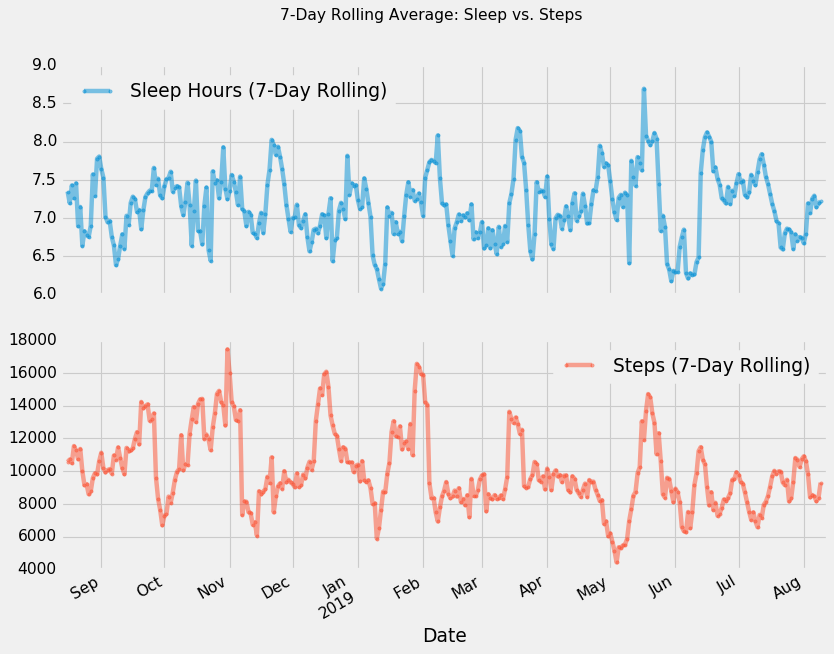

In [23]:
cols_plot = ['Sleep Hours (7-Day Rolling)', 'Steps (7-Day Rolling)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
plt.suptitle("7-Day Rolling Average: Sleep vs. Steps")

Sleep Hours (7-Day Rolling)
Sleep (Monthly)


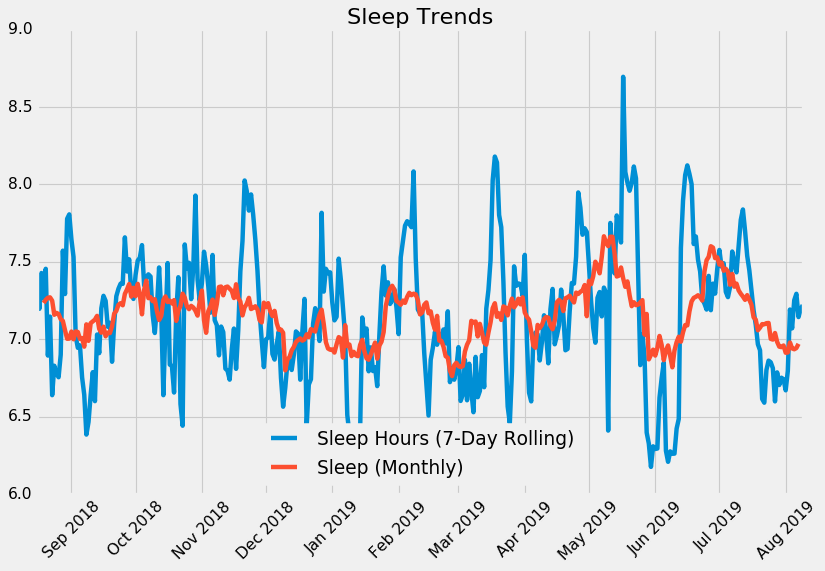

In [24]:
cols_plot = ['Sleep Hours (7-Day Rolling)', 'Sleep (Monthly)']
fig, ax = plt.subplots(figsize=(11, 7))
for nm in cols_plot:
    ax.plot(df[nm], label=nm)
    print(nm)

ax.legend(loc='lower center')
ax.set_title("Sleep Trends")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Steps (7-Day Rolling)
Steps (Monthly)


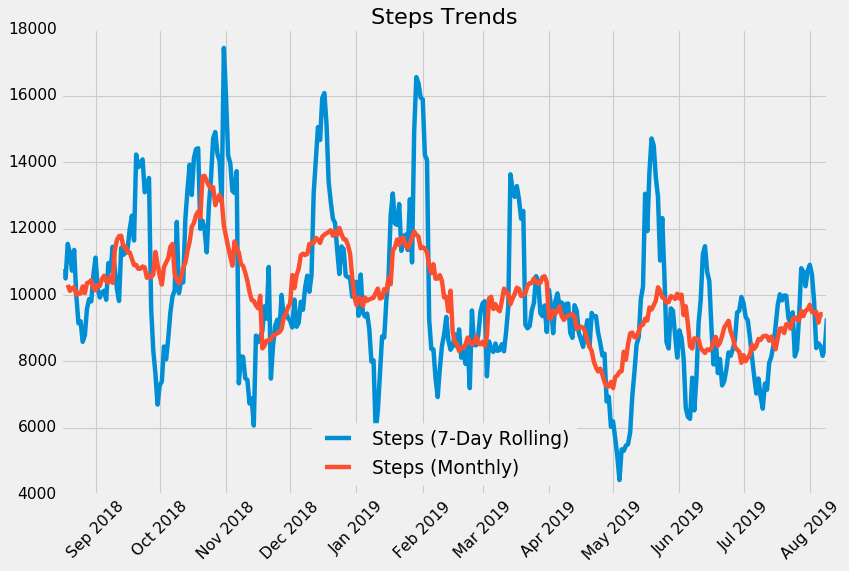

In [25]:
cols_plot = ['Steps (7-Day Rolling)', 'Steps (Monthly)']
fig, ax = plt.subplots(figsize=(11, 7))
for nm in cols_plot:
    ax.plot(df[nm], label=nm)
    print(nm)

ax.legend(loc='lower center')
ax.set_title("Steps Trends")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

## Z-Scores

In [26]:
def mean_calc(data, col):
    mean = round(data[col].mean(),2)
    std = round(data[col].std(ddof=0),2)
    max = data[col].max()
    print(col+ ": Mean: " + str(mean) + "| STD: "+str(std) + "| Max: "+str(max))

In [27]:
mean_calc(df, 'Sleep Hours')

Sleep Hours: Mean: 7.15| STD: 1.34| Max: 15.2


In [28]:
mean_calc(df, 'Steps')

Steps: Mean: 9962.18| STD: 5467.28| Max: 52761


In [29]:
cols = ['Sleep',
 'Steps']

for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

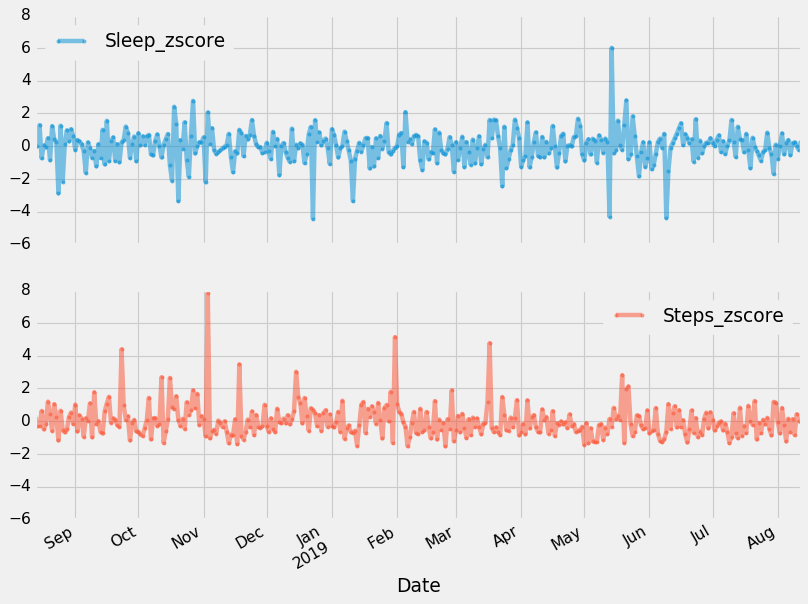

In [30]:
cols_plot = ['Sleep_zscore', 'Steps_zscore']
axes = df[cols_plot].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True, sharey=True)

Text(0.5, 0.98, 'Monthly: Sleep vs. Steps')

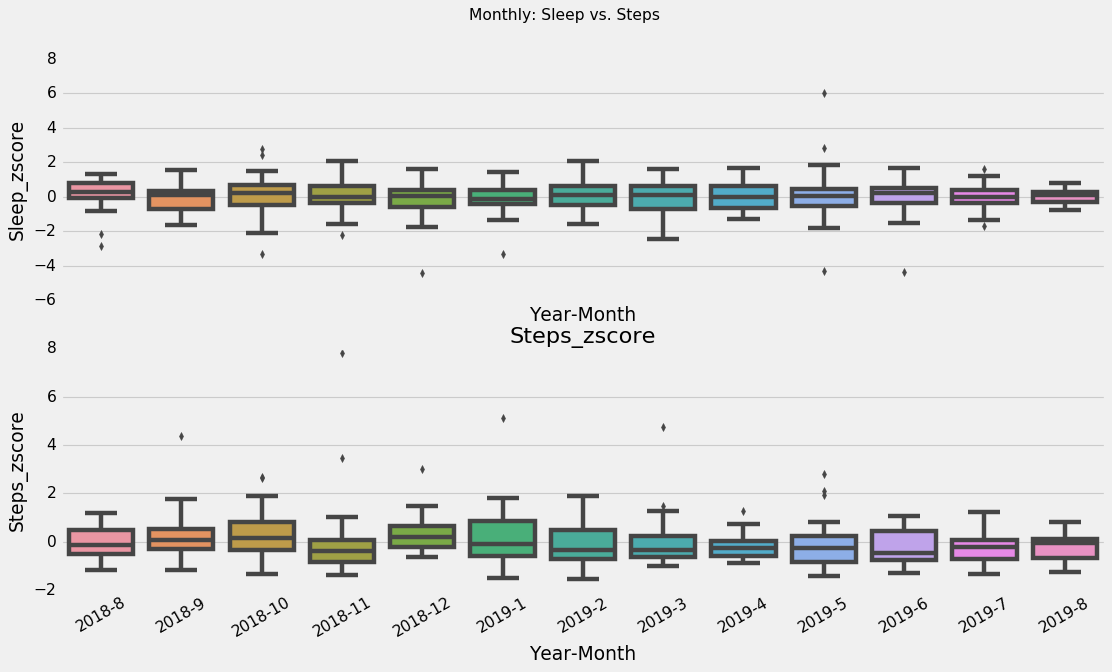

In [31]:
cols_plot = ['Sleep_zscore', 'Steps_zscore']
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
for name, ax in zip(cols_plot, axes):
    # print(name)
    sns.boxplot(data=df, x='Year-Month', y=name, ax=ax)
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)    
plt.suptitle("Monthly: Sleep vs. Steps")    

Text(0.5, 0.98, 'Monthly: Sleep vs. Steps')

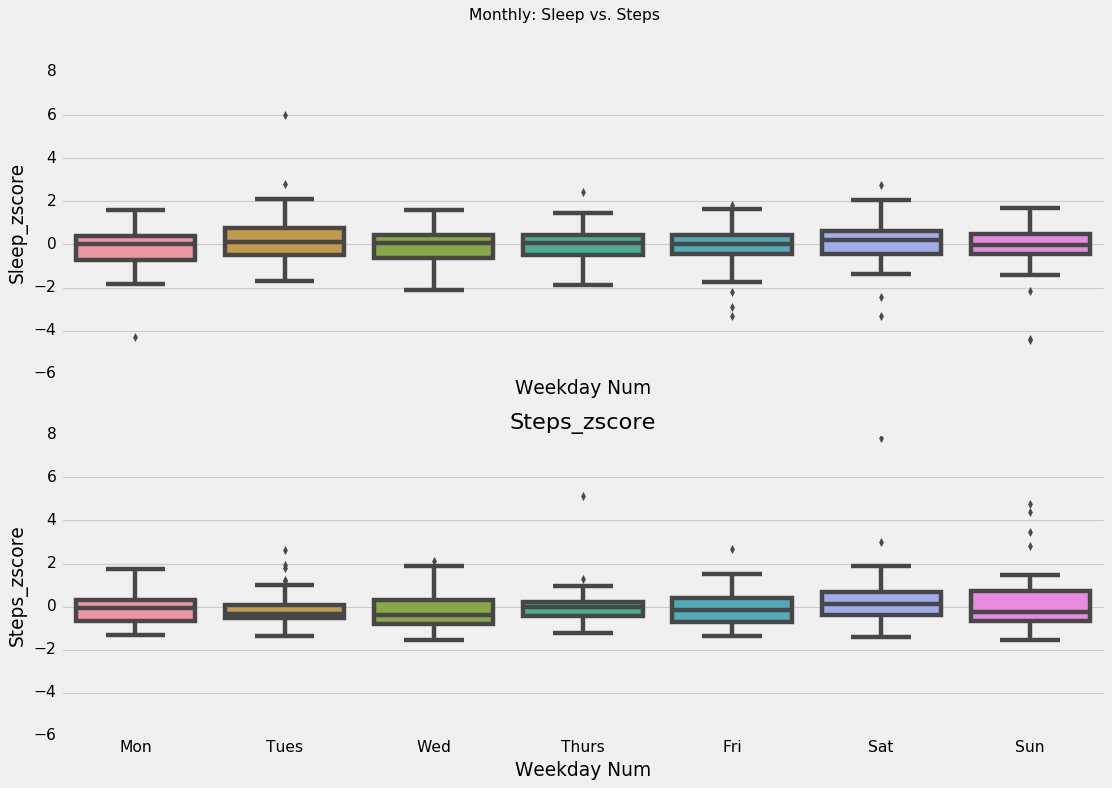

In [32]:
# cols_plot = ['Sleep_zscore', 'Steps_zscore']
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True, sharey=True)
for name, ax in zip(cols_plot, axes):
    # print(name)
    sns.boxplot(data=df, x='Weekday Num', y=name, ax=ax)
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
ax.set_xticklabels(["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"],rotation=0)    
plt.suptitle("Monthly: Sleep vs. Steps")    

## Outliers Detection with Boxplot and IQR

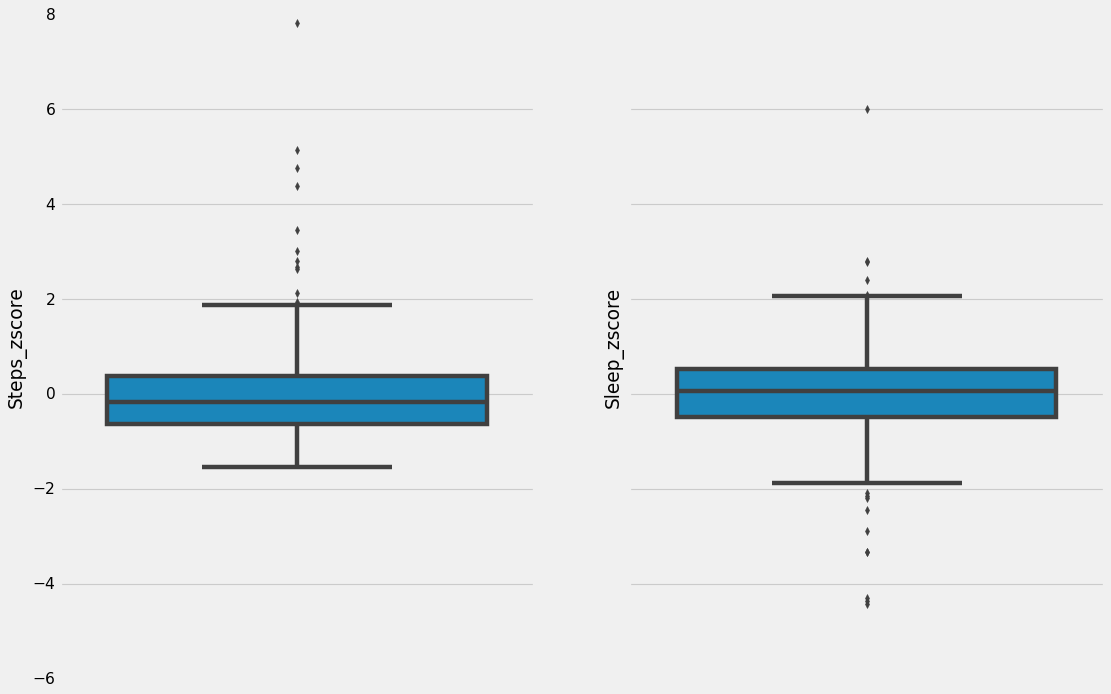

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
for name, ax in zip(['Steps_zscore', 'Sleep_zscore'], axes):
    sns.boxplot(data=df, y=name, ax=ax)

In [34]:
def outlier_detecter(data, col, cut_off):
    # calculate summary statistics
    data_mean, data_std = np.mean(data[col]), np.std(data[col])
    # identify outliers
    cut_off = data_std * cut_off
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # calculate interquartile range
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # identify outliers
    outliers = [x for x in data[col] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    non_outliers = [x for x in data[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(non_outliers))
    return outliers

In [35]:
outliers_sleep = outlier_detecter(df, 'Sleep', 2.5)
outliers_sleep

Percentiles: 25th=390.000, 75th=472.000, IQR=82.000
Identified outliers: 9
Non-outlier observations: 356


[198.0, 161.0, 652.0, 74.0, 161.0, 84.0, 912.0, 654.0, 78.0]

In [36]:
outlier_steps = outlier_detecter(df, 'Steps', 2.5)
outlier_steps

Percentiles: 25th=6448.000, 75th=12074.000, IQR=5626.000
Identified outliers: 9
Non-outlier observations: 356


[33963, 24637, 24408, 52761, 28888, 26454, 38039, 36017, 25331]

In [37]:
def outlier_tagger(data, col, cut_off, outlier_col):
    # calculate summary statistics
    data_mean, data_std = np.mean(data[col]), np.std(data[col])
    # identify outliers
    cut_off = data_std * cut_off
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    for index, row in data.iterrows():
        if row[col] < lower or row[col] > upper:
            df.at[index,outlier_col] = 1
            # print(row[col])

In [38]:
df['Sleep_Outlier'] = 0
df['Steps_Outlier'] = 0
outlier_tagger(df, 'Steps', 2.5, 'Steps_Outlier')
outlier_tagger(df, 'Sleep', 2.5, 'Sleep_Outlier')

In [39]:
# export lightly processed data
df.to_csv(data_directory+'processed_data.csv')